# Different distributions from numpy

## Uniform
| PDF | CDF | $\mathbb{E}[X] = \mu$ | $\mathbb{V}[X] = \sigma^2 $|
| ------- | ------- | ------- | ------- |
| $$f(x)=\frac{1}{b-a} \\ a\leq x\leq b$$ | $$F(x) = \begin{cases} 0, \quad &x < a\\ \frac{x-a}{b-a}, \quad &a\leq x \leq b\\ 1, \quad &x > b \end{cases}$$ | $$\frac{a+b}{2}$$ | $$\frac{(b-a)^2}{12}$$ |

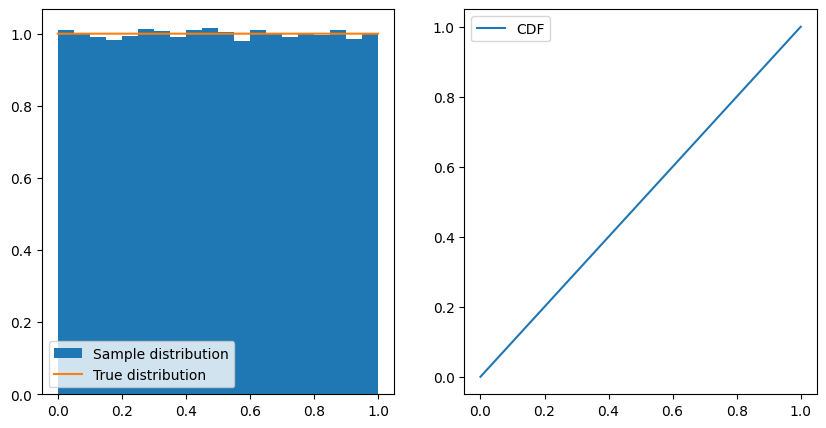

In [130]:
import numpy as np
import matplotlib.pyplot as plt
a = 0
b = 1
U_pdf = np.vectorize(lambda x: 1/(b-a) if a<=x<=b else 0)
U_cdf = np.vectorize(lambda x: 0 if x < a else ((x-a)/(b-a) if a<=x<=b else 1))

size = 100000
samples = np.random.uniform(a, b, size)
xs = np.linspace(a, b, size)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(samples, density=True, bins=20, label="Sample distribution")
ax1.plot(xs, U_pdf(xs), label="True distribution")
ax2.plot(xs, U_cdf(xs), label="CDF")
ax1.legend()
ax2.legend()
plt.show()

## Exponential
| PDF | CDF | $\mathbb{E}[X] = \mu$ | $\mathbb{V}[X] = \sigma^2 $|
| ------- | ------- | ------- | ------- |
| $$f(x)=\frac{1}{\beta}e^{-x/\beta} \\ 0\leq x$$ | $$F(x) = \begin{cases} 0, \quad &x < 0\\ 1-e^{-x/\beta}, \quad &x \geq 0\end{cases}$$ | $$\beta$$ | $$\beta^2$$ |

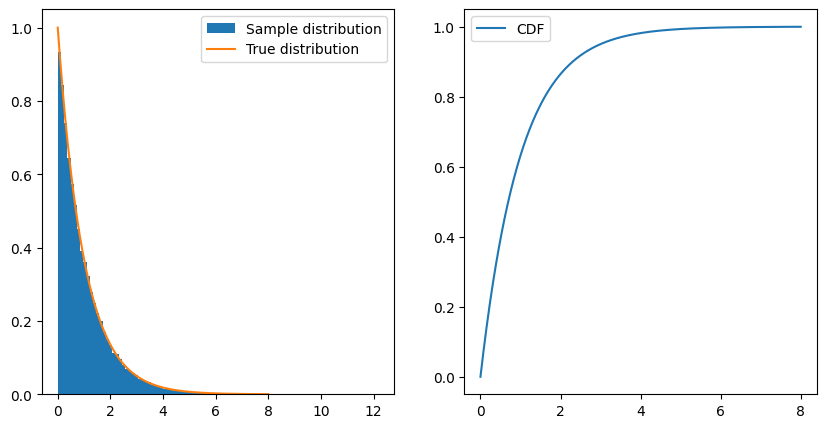

In [26]:
import numpy as np
import matplotlib.pyplot as plt
a = 0
b = 8
beta = 1
exp_pdf = np.vectorize(lambda x: 1/beta*np.exp(-x/beta) if 0<=x else 0)
exp_cdf = np.vectorize(lambda x: 1-np.exp(-x/beta) if x >= 0 else 0)

size = 100000
samples = np.random.exponential(beta, size)
xs = np.linspace(a, b, size)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(samples, density=True, bins=100, label="Sample distribution")
ax1.plot(xs, exp_pdf(xs), label="True distribution")
ax2.plot(xs, exp_cdf(xs), label="CDF")
ax1.legend()
ax2.legend()
plt.show()

## Power
| PDF | CDF | $\mathbb{E}[X] = \mu$ | $\mathbb{V}[X] = \sigma^2 $|
| ------- | ------- | ------- | ------- |
| $$f(x)=\lambda x^{\lambda-1} \\ 0\leq x \leq 1\\\lambda>0$$ | $$F(x) = \begin{cases} 0, \quad &x < 0\\ x^\lambda, \quad &0\leq x \leq 1\\1, \quad &1<x\end{cases}$$ | $$\frac{\lambda}{\lambda+1}$$ | $$\frac{\lambda}{(\lambda+2)(\lambda+1)^2}$$ |
| $$f(x)=\frac{\lambda}{b-a} \left(\frac{x-a}{b-a}\right)^{\lambda-1} \\ a\leq x \leq b\\\lambda>0$$ | $$F(x) = \begin{cases} 0, \quad &x < a\\ \left(\frac{x-a}{b-a}\right)^\lambda, \quad &a\leq x \leq b\\1, \quad &b<x\end{cases}$$ |  | |

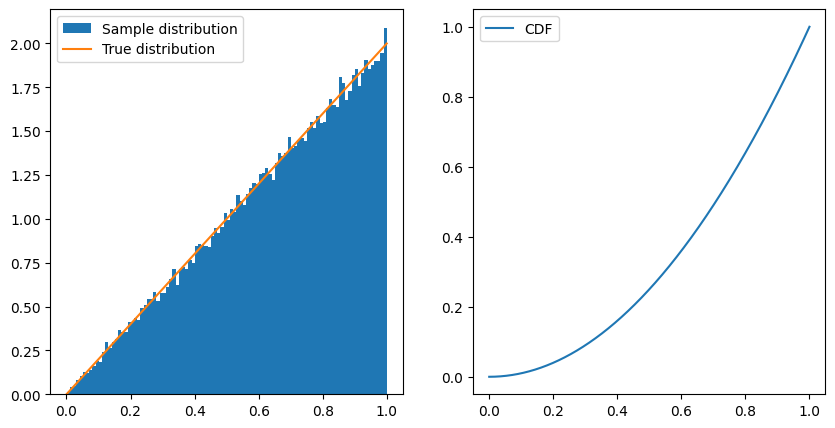

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import powerlaw
a = 0
b=2
scale=b-a
_lambda = 3.

pow_pdf = np.vectorize(lambda x: _lambda*np.power((x-a)/scale, _lambda-1)/scale if a<=x<=b else 0)
pow_cdf = np.vectorize(lambda x: 0 if x < a else (np.power((x-a)/scale, _lambda) if a<=x<=b else 1))


#pow_pdf = lambda x: powerlaw.pdf(x, _lambda, a, scale)
#pow_cdf = lambda x: powerlaw.cdf(x, _lambda, a, scale)


size = 100000
samples = np.random.power(_lambda, size)*scale+a
xs = np.linspace(a, b, size)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(samples, density=True, bins=100, label="Sample distribution")
ax1.plot(xs, pow_pdf(xs), label="True distribution")
ax2.plot(xs, pow_cdf(xs), label="CDF")
ax1.legend()
ax2.legend()
plt.show()

### Special case for linear PDF using power
$\lambda = 2$ gives
$$f(x)=\frac{2}{b-a} \left(\frac{x-a}{b-a}\right)^{1}=\frac{2(x-a)}{(b-a)^2} = \frac{2}{(b-a)^2}x - \frac{2a}{(b-a)^2}$$
so for $f(x) = kx + m$ we get $k = \frac{2}{(b-a)^2}$ and $m = -\frac{2a}{(b-a)^2}$:

$$f(x) = \frac{2}{(b-a)^2}x -\frac{2a}{(b-a)^2}$$

| PDF | Parameters | CDF |
| ------- | ------- | ------- |
| $$f(x)=kx+m\\ a\leq x \leq b$$ | $$k = \frac{2}{(b-a)^2}\\m = -\frac{2a}{(b-a)^2}$$ | $$F(x) = \begin{cases} 0, \quad &x < a\\ \left(\frac{x-a}{b-a}\right)^2, \quad &a\leq x \leq b\\1, \quad &b<x\end{cases}$$ |

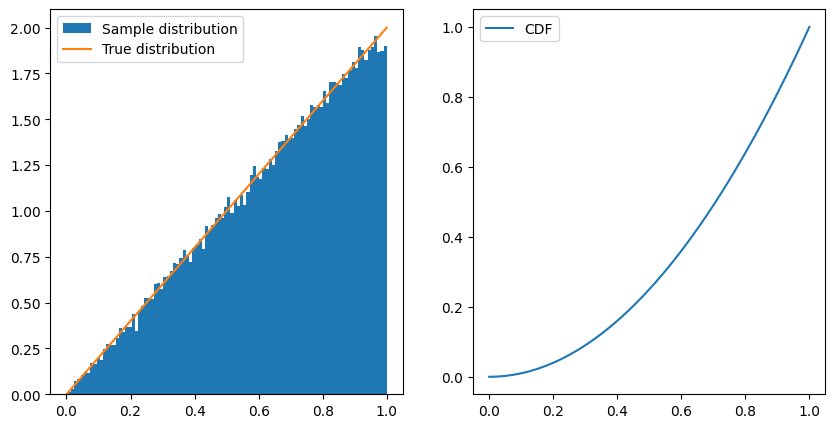

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import powerlaw
_lambda = 2.
a = 0
b=1
scale=b-a
k = 2/scale**2
m = -2*a/scale**2

pow_pdf = np.vectorize(lambda x: k*x + m if a<=x<=b else 0)

pow_cdf = np.vectorize(lambda x: 0 if x < a else (((x-a)/scale)**2 if a<=x<=b else 1))

#pow_pdf = lambda x: powerlaw.pdf(x, _lambda, a, scale)
#pow_cdf = lambda x: powerlaw.cdf(x, _lambda, a, scale)


size = 100000
samples = np.random.power(_lambda, size)*scale+a
xs = np.linspace(a, b, size)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(samples, density=True, bins=100, label="Sample distribution")
ax1.plot(xs, pow_pdf(xs), label="True distribution")
ax2.plot(xs, pow_cdf(xs), label="CDF")
ax1.legend()
ax2.legend()
plt.show()

## Normal/Gaussian

| PDF | CDF | $\mathbb{E}[X] = \mu$ | $\mathbb{V}[X] = \sigma^2 $|
| ------- | ------- | ------- | ------- |
| $$f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}\\ -\infty\leq x \leq \infty $$ | $$F(x) = \Phi(\frac{x-\mu}{\sigma})$$ | $$\mu$$ | $$\sigma^2$$ |

where $$\Phi(\frac{x-\mu}{\sigma}) = \frac{1}{2}\left[1+\text{erf}(\frac{x-\mu}{\sigma\sqrt{2}})\right]$$
$$\text{erf}(x) = \frac{2}{\sqrt{\pi}}\int_0^xe^{-t^2}dt$$

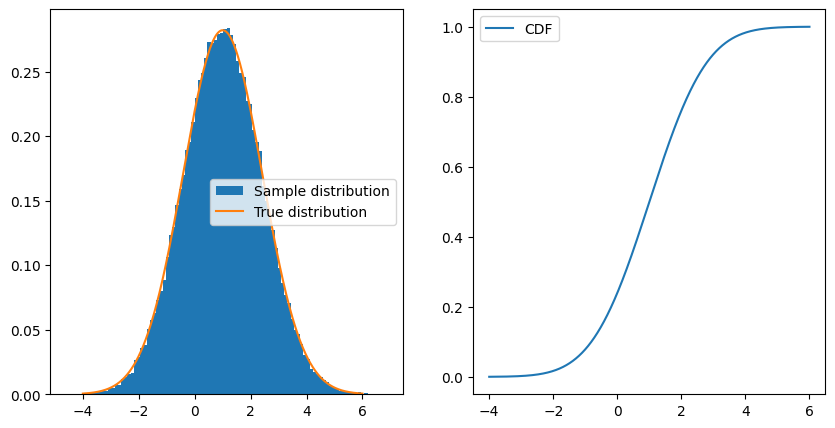

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
sigma_2 = 2
stdev = np.sqrt(sigma_2)
mu = 1
#norm_pdf = np.vectorize(lambda x: np.exp(-(x-mu)**2/(2*sigma_2))/np.sqrt(2*np.pi*sigma_2))
norm_pdf = lambda x: norm.pdf(x, mu, stdev)
norm_cdf = lambda x: norm.cdf(x, mu, stdev)

size = 100000
samples = np.random.normal(mu, stdev, size)
a = -5 + mu
b = -a + 2*mu
xs = np.linspace(a, b, size)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(samples, density=True, bins=100, label="Sample distribution")
ax1.plot(xs, norm_pdf(xs), label="True distribution")
ax2.plot(xs, norm_cdf(xs), label="CDF")
ax1.legend()
ax2.legend()
plt.show()

## Beta

| PDF | Parameters | CDF | $\mathbb{E}[X] = \mu$ | $\mathbb{V}[X] = \sigma^2 $|
| ------- | ------- | ------- | ------- | ------- |
| $$f(x)=\frac{1}{B(\alpha, \beta)}x^{\alpha-1}{\beta-1}\\ B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)} \text{ or } B(\alpha, \beta) = \int_0^1t^{\alpha-1}(1-t)^{\beta-1}$$ | $$0\leq x \leq 1 \\ \alpha, \beta > 0$$ | $$F(x) = I_x(\alpha, \beta)$$ | $$\frac{\alpha}{\alpha + \beta}$$ | $$\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha + \beta + 1)}$$ |

The beta function $B$, is a normalization constant to ensure that the total probability is 1.

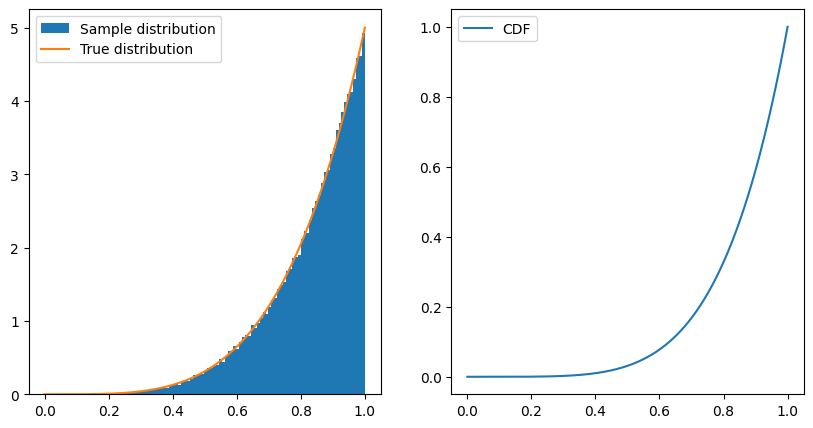

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.special import gamma


a = 0
b = 1
alpha = 5
beta_param=1
B = gamma(alpha+beta_param)/(gamma(alpha)*gamma(beta_param))

gamma_pdf = lambda x: np.power(x, alpha-1)*np.power(1-x, beta_param-1)*B

#gamma_pdf = lambda x: beta.pdf(x, alpha, beta_param)
gamma_cdf = lambda x: beta.cdf(x, alpha, beta_param)

size = 100000
samples = np.random.beta(alpha, beta_param, size)
xs = np.linspace(a, b, size)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(samples, density=True, bins=100, label="Sample distribution")
ax1.plot(xs, gamma_pdf(xs), label="True distribution")
ax2.plot(xs, gamma_cdf(xs), label="CDF")
ax1.legend()
ax2.legend()
plt.show()

## Linear
| PDF | CDF | $\mathbb{E}[X] = \mu$ | $\mathbb{V}[X] = \sigma^2 $|
| ------- | ------- | ------- | ------- |
| $$f(x) = \beta_1x + \beta_0  \\ a\leq x\leq b\\b =-\frac{\beta_{0}}{\beta_{1}}+\sqrt{\left(\frac{\beta_{0}}{\beta_{1}}\right)^{2}+a^{2}+2\frac{\beta_{0}}{\beta_{1}}a+\frac{2}{\beta_{1}}}$$ | $$F(x) = \begin{cases} 0, \quad &x < a\\ \frac{\beta_1}{2}x^2 + \beta_0x, \quad &a\leq x \leq b\\ 1, \quad &x > b \end{cases}$$ | $$\frac{\beta_1}{3}(b^3-a^3) + \frac{\beta_0}{2}(b-a) $$ | _ |
| $$f(x) = \beta x  \\ 0\leq x\leq b\\b = \pm \sqrt{\frac{2}{\beta}} \leftrightarrow \beta = \frac{2}{b^2}$$ | $$F(x) = \begin{cases} 0, \quad &x < a\\ \frac{\beta}{2}x^2, \quad &0\leq x \leq b\\ 1, \quad &x > b \end{cases}$$ | $$\frac{\beta}{3}b^3$$ | _ |


If $\beta_0 = 0$ then $b = \pm \sqrt{a^2 + \frac{2}{\beta_1}} \rightarrow \beta_1 = \frac{2}{b^2-a^2}$.

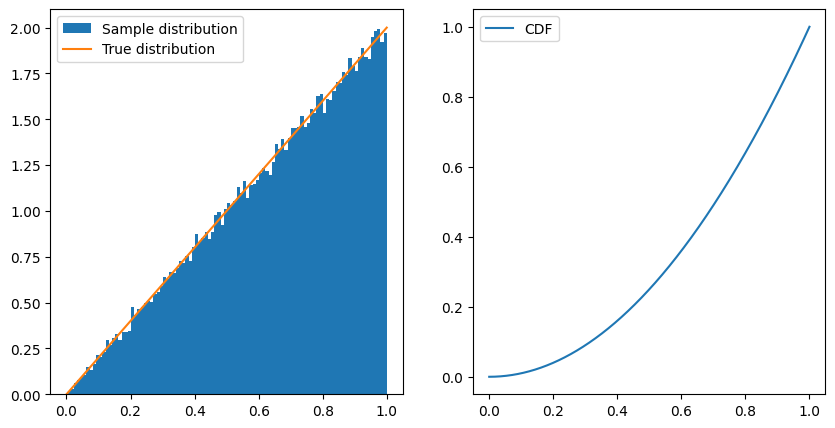

In [242]:
import numpy as np
import matplotlib.pyplot as plt
a = 0
b = 1
beta = 2/(b**2-a**2) 
lin_pdf = np.vectorize(lambda x: x*beta if a<=x<=b else 0)
lin_cdf = np.vectorize(lambda x: 0 if x < a else (beta/2*x**2 if a<=x<=b else 1))

size = 100000
samples = np.random.triangular(a, b, b, size)
xs = np.linspace(a, b, size)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(samples, density=True, bins=100, label="Sample distribution")
ax1.plot(xs, lin_pdf(xs), label="True distribution")
ax2.plot(xs, lin_cdf(xs), label="CDF")
ax1.legend()
ax2.legend()
plt.show()